# Practicing web-scraping

I have so far encountered 2 categories websites: the typical scrapable ones, and the infinitely loading ones. The former I scrape using beautiful soup. The latter using an API or finding the relevant JSON file in the XHR section. 

## Scrape Basketball player data from nba.com and gather some insights. Preliminary questions: How is height related to performance?


In [235]:
#all relevant imports
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import json
import pandas as pd
import numpy as np
import urllib
from time import sleep

In [183]:
def df_from_json_url(json_url):
#NBA.com works with jsons. Here is a function that will load and read jsons and return a dataframe.
    with urllib.request.urlopen(json_url) as url:
        data = json.loads(url.read().decode())
    return pd.io.json.json_normalize(data)

In [62]:
#get players data
players_df = df_from_json_url("http://www.nba.com/players/active_players.json")

In [63]:
#visualize this players dataframe
players_df.head()

,displayName,firstName,heightFeet,heightInches,isAllStar,jersey,lastName,orderChar,personId,playerUrl,pos,posExpanded,teamData.city,teamData.nickname,teamData.tricode,teamData.urlName,weightPounds
0,"Abrines, Alex",Alex,6,6,False,8,Abrines,A,203518,/players/alex/abrines/203518,G,Guard,Oklahoma City,Thunder,OKC,thunder,190
1,"Acy, Quincy",Quincy,6,7,False,13,Acy,A,203112,/players/quincy/acy/203112,F,Forward,Brooklyn,Nets,BKN,nets,240
2,"Adams, Jaylen",Jaylen,6,2,False,,Adams,A,1629121,/players/jaylen/adams/1629121,G,Guard,Atlanta,Hawks,ATL,hawks,190
3,"Adams, Steven",Steven,7,0,False,12,Adams,A,203500,/players/steven/adams/203500,C,Center,Oklahoma City,Thunder,OKC,thunder,255
4,"Adebayo, Bam",Bam,6,10,False,13,Adebayo,A,1628389,/players/bam/adebayo/1628389,C-F,Center-Forward,Miami,Heat,MIA,heat,255


In [103]:
#get stats of first player and visualize
for ID in df.personId[:1]: 
    df_stats = df_from_json_url("https://data.nba.net/prod/v1/2018/players/" + ID + "_profile.json")
    df_stats['player_ID'] = ID
df_stats


,_internal.eventName,_internal.pubDateTime,_internal.xslt,league.standard.stats.careerSummary.apg,league.standard.stats.careerSummary.assists,league.standard.stats.careerSummary.blocks,league.standard.stats.careerSummary.bpg,league.standard.stats.careerSummary.dd2,league.standard.stats.careerSummary.defReb,league.standard.stats.careerSummary.fga,...,league.standard.stats.latest.td3,league.standard.stats.latest.topg,league.standard.stats.latest.totReb,league.standard.stats.latest.tpa,league.standard.stats.latest.tpm,league.standard.stats.latest.tpp,league.standard.stats.latest.turnovers,league.standard.stats.regularSeason.season,league.standard.teamId,player_ID
0,player,2018-08-16 04:02:51.875,xsl/player/marty_player_profile.xsl,0.5,68,16,0.1,0,156,632,...,-1,-1,-1,-1,-1,-1,-1,"[{'seasonYear': 2017, 'teams': [{'teamId': '16...",1610612760,203518


In [104]:
for ID in df.personId[1:10]:
    df_temp = df_from_json_url("https://data.nba.net/prod/v1/2018/players/" + ID + "_profile.json")
    df_temp['player_ID'] = ID
    df_stats = pd.concat([df_stats,df_temp])
    sleep(0.2)

In [107]:
players_df.head(0)

,_internal.eventName,_internal.pubDateTime,_internal.xslt,league.sacramento.stats.careerSummary.apg,league.sacramento.stats.careerSummary.assists,league.sacramento.stats.careerSummary.blocks,league.sacramento.stats.careerSummary.bpg,league.sacramento.stats.careerSummary.dd2,league.sacramento.stats.careerSummary.defReb,league.sacramento.stats.careerSummary.fga,...,league.vegas.stats.latest.td3,league.vegas.stats.latest.topg,league.vegas.stats.latest.totReb,league.vegas.stats.latest.tpa,league.vegas.stats.latest.tpm,league.vegas.stats.latest.tpp,league.vegas.stats.latest.turnovers,league.vegas.stats.regularSeason.season,league.vegas.teamId,player_ID
0,player,2018-08-16 04:02:51.875,xsl/player/marty_player_profile.xsl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203518
0,player,2018-08-16 04:01:49.446,xsl/player/marty_player_profile.xsl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203112
0,player,2018-08-16 04:00:06.06,xsl/player/marty_player_profile.xsl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629121
0,player,2018-08-16 04:05:42.128,xsl/player/marty_player_profile.xsl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203500
0,player,2018-08-16 04:05:40.369,xsl/player/marty_player_profile.xsl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1628389
0,player,2018-08-16 04:02:02.615,xsl/player/marty_player_profile.xsl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201167
0,player,2018-08-16 04:00:26.901,xsl/player/marty_player_profile.xsl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201582
0,player,2018-08-16 04:00:48.441,xsl/player/marty_player_profile.xsl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1629152
0,player,2018-08-16 04:02:43.008,xsl/player/marty_player_profile.xsl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200746
0,player,2018-08-16 04:05:42.214,xsl/player/marty_player_profile.xsl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1628959


In [106]:
for ID in df.personId[10:]:
    df_temp = df_from_json_url("https://data.nba.net/prod/v1/2018/players/" + ID + "_profile.json")
    df_temp['player_ID'] = ID
    df_stats = pd.concat([df_stats,df_temp])
    sleep(0.2)

In [108]:
#store just in cae
df_stats.to_pickle('basketballstats.pkl')
players_df.to_pickle('basketballplayers.pkl')

### Currenlty have loaded data from jsons only. Also try to scrape each individual players page to get their age etc. 

In [172]:
#add an empty column for player age and years in NBA
players_df['age'] = np.nan
players_df['years_in_nba'] = np.nan

In [176]:
#change players dataframe index to playerID
players_df.set_index(['personId'], inplace = True)

In [216]:
def player_age_experience(ID):
#take player ID and add age and experience to the dataframe
    url = 'http://www.nba.com' + players_df.loc[ID,'playerUrl']
    file = requests.get(url)
    pagecontent = file.text
    soup = BeautifulSoup(pagecontent,'html.parser')
    labels = soup.find_all('span', class_ = 'nba-player-vitals__bottom-heading')
    values = soup.find_all('span', class_ = 'nba-player-vitals__bottom-info')
    for label, value in zip(labels,values):
        if label.text == 'AGE':
            if value.text.split()[0].isdigit():
                players_df.loc[ID,'age'] = float(value.text.split()[0])
        elif label.text == 'YEARS IN NBA':
            if value.text.split()[0].isdigit():    
                players_df.loc[ID,'years_in_nba'] = float(value.text.split()[0])
                return()
        


In [222]:
for ID in players_df.index:
    if np.isnan(players_df.loc[ID,'age']):
        player_age_experience(ID)
        sleep(0.2)

In [223]:
players_df.tail()

,displayName,firstName,heightFeet,heightInches,isAllStar,jersey,lastName,orderChar,playerUrl,pos,posExpanded,teamData.city,teamData.nickname,teamData.tricode,teamData.urlName,weightPounds,age,years_in_nba
personId,,,,,,,,,,,,,,,,,,
1629027,"Young, Trae",Trae,6,2,False,,Young,Y,/players/trae/young/1629027,G,Guard,Atlanta,Hawks,ATL,hawks,178,19.0,0.0
203469,"Zeller, Cody",Cody,7,0,False,40,Zeller,Z,/players/cody/zeller/203469,C-F,Center-Forward,Charlotte,Hornets,CHA,hornets,240,25.0,5.0
203092,"Zeller, Tyler",Tyler,7,0,False,44,Zeller,Z,/players/tyler/zeller/203092,C,Center,Milwaukee,Bucks,MIL,bucks,250,28.0,6.0
1627790,"Zizic, Ante",Ante,6,11,False,41,Zizic,Z,/players/ante/zizic/1627790,F-C,Forward-Center,Cleveland,Cavaliers,CLE,cavaliers,250,21.0,1.0
1627826,"Zubac, Ivica",Ivica,7,1,False,40,Zubac,Z,/players/ivica/zubac/1627826,C,Center,Los Angeles,Lakers,LAL,lakers,240,21.0,2.0


In [224]:
#store just in case
df_stats.to_pickle('basketballstats.pkl')
players_df.to_pickle('basketballplayers.pkl')

In [186]:
labels = soup.find_all('span', class_ = 'nba-player-vitals__bottom-heading')
values = soup.find_all('span', class_ = 'nba-player-vitals__bottom-info')

In [207]:
for label, value in zip(labels,values):
    print(label)
    if label.text == 'AGE':
        if value.text.split()[0].isdigit():
            print(float(value.text.split()[0]))
    if label.text == 'YEARS IN NBA':
            print(float(value.text.split()[0]))



<span class="nba-player-vitals__bottom-heading">BORN</span>
<span class="nba-player-vitals__bottom-heading">AGE</span>
25.0
<span class="nba-player-vitals__bottom-heading">FROM</span>
<span class="nba-player-vitals__bottom-heading">NBA DEBUT</span>
<span class="nba-player-vitals__bottom-heading">YEARS IN NBA</span>
2.0
<span class="nba-player-vitals__bottom-heading">PREVIOUSLY</span>


## Visualize the data

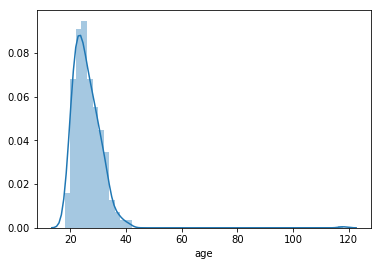

In [266]:
#age of current basketball players
sns.distplot(players_df.age.dropna())


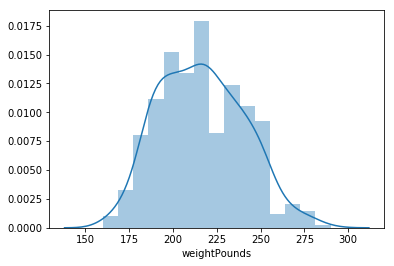

In [265]:
sns.distplot(pd.to_numeric(players_df.weightPounds).dropna())

In [271]:
players_df.replace(to_replace = '-', value = np.nan, inplace = True)

In [274]:
players_df['heightFeet'] = pd.to_numeric(players_df.heightFeet)

In [276]:
players_df['heightInches'] = pd.to_numeric(players_df.heightInches)

In [277]:
players_df['height'] = players_df.heightFeet * 12 + players_df.heightInches

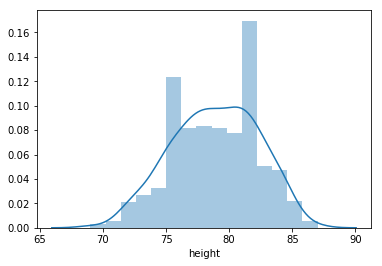

In [279]:
sns.distplot(players_df.height.dropna())